## Empirical formula to help suggested loss

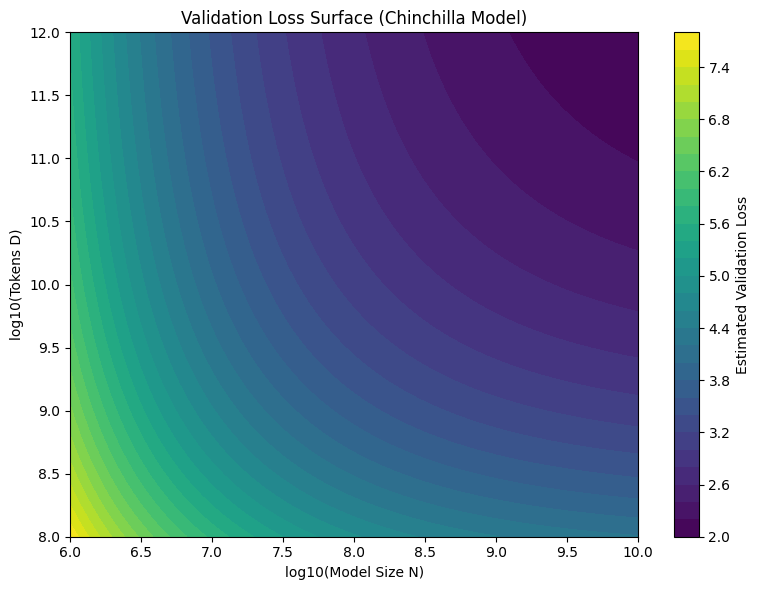

In [5]:
## Empirical formula to help suggested loss
import numpy as np
import matplotlib.pyplot as plt

# Chinchilla-fitted constants (from paper; approximate)
a, b = 406.4, 0.34
c, d = 410.7, 0.28
e = 1.69  # Irreducible loss

# Model size N and dataset size D
N = np.logspace(6, 10, 100)   # parameters
D = np.logspace(8, 12, 100)   # tokens

# Meshgrid
N_grid, D_grid = np.meshgrid(N, D)
L = a * N_grid**(-b) + c * D_grid**(-d) + e

# Plotting heatmap
plt.figure(figsize=(8, 6))
cp = plt.contourf(np.log10(N), np.log10(D), L, levels=30, cmap='viridis')
plt.colorbar(cp, label='Estimated Validation Loss')
plt.xlabel('log10(Model Size N)')
plt.ylabel('log10(Tokens D)')
plt.title('Validation Loss Surface (Chinchilla Model)')
plt.tight_layout()
plt.show()

In [1]:
# Parameters from the empirical loss function in Chinchilla (Equation 2)
a = 1.69
b = 406.4
c = 410.7
alpha = 0.34
beta = 0.28

# Define a function to forecast loss given N (params) and D (tokens)
def forecast_loss(N, D):
    return a + (b / (N ** alpha)) + (c / (D ** beta))

# Example 1: 30B model, 600B tokens
N1 = 30e9
D1 = 600e9
L1 = forecast_loss(N1, D1)

# Example 2: 70B model, 1.4T tokens (Chinchilla reference point)
N2 = 70e9
D2 = 1.4e12
L2 = forecast_loss(N2, D2)

# Example 3: 175B model, 300B tokens (like GPT-3, undertrained)
N3 = 175e9
D3 = 300e9
L3 = forecast_loss(N3, D3)

# Output all three forecasts
L1, L2, L3


(2.0082045596342097, 1.9366454705587173, 2.0022879365177095)

## Scaling Laws Reproduction

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

np.random.seed(42)
compute = np.logspace(18,23,20) # Total compute(FLOPs)
true_A, true_alpha, true_B = 1.5, 0.05, 1.0
loss = true_A * compute**(-true_alpha) + true_B + np.random.normal(0, 0.01, len(compute))

# Define power law function and fit
def power_law(x, A, alpha, B):
  return A * x**(-alpha) + B

popt, _ = curve_fit(power_law, compute, loss, p0=[1.0, 0.1, 1.0])
fitted_loss = power_law(compute, *popt)


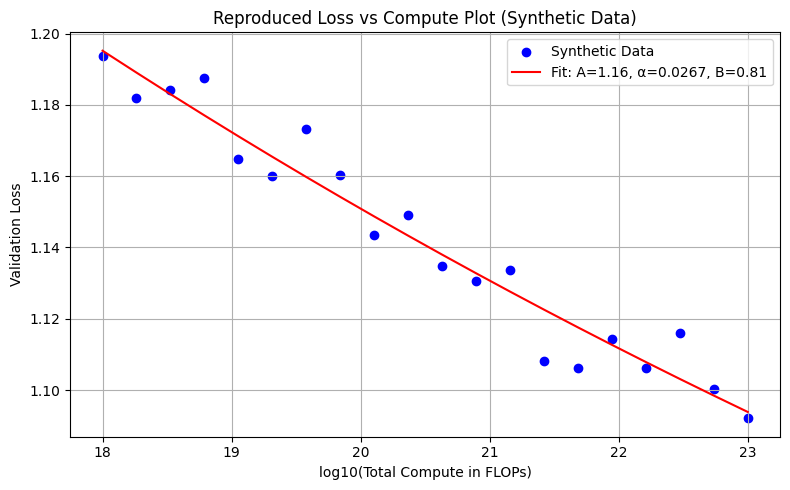

In [4]:
# Plot the results
plt.figure(figsize=(8, 5))
plt.scatter(np.log10(compute), loss, label='Synthetic Data', color='blue')
plt.plot(np.log10(compute), fitted_loss, label=f'Fit: A={popt[0]:.2f}, α={popt[1]:.4f}, B={popt[2]:.2f}', color='red')
plt.xlabel('log10(Total Compute in FLOPs)')
plt.ylabel('Validation Loss')
plt.title('Reproduced Loss vs Compute Plot (Synthetic Data)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()